## 시리즈와 데이터프레임 직접 만들기
### 데이터프레임과 시리즈는 리스트나 딕셔너리와 비슷하지만 데이터를 다루는데 더 특화되어있다.

In [1]:
import pandas as pd

In [2]:
s = pd.Series(['apple', 33])
print(s)

0    apple
1       33
dtype: object


In [3]:
list_data = ['2022-07-25', 3.14, 'sesac', 100, True]
s = pd.Series(list_data)
print(s)
print()
print(type(s))

0    2022-07-25
1          3.14
2         sesac
3           100
4          True
dtype: object

<class 'pandas.core.series.Series'>


In [4]:
# 인덱스 배열은 변수 idx 에 저장
# 데이터 값 배열은 변수 val 에 저장
idx = s.index
val = s.values
print(idx)
print()
print(val)

RangeIndex(start=0, stop=5, step=1)

['2022-07-25' 3.14 'sesac' 100 True]


In [5]:
# dict를 시리즈 함수에 전달하면 시리즈 객체로 변환
dict_data = {'a':1, 'b':2, 'c':3}
s = pd.Series(dict_data)
print(s)
print(type(s))

a    1
b    2
c    3
dtype: int64
<class 'pandas.core.series.Series'>


In [6]:
# 시리즈를 생성할 때 인덱스를 별도 지정해 생성할 수 있다.
s = pd.Series(['Jane', 'student'], index=['Person','Job'])
print(s)

Person       Jane
Job       student
dtype: object


In [7]:
# dict로 데이터프레임을 만들 경우 dict의 키가 컬럼, 밸류값이 데이터로 변환된다.
scientists = pd.DataFrame(
    {'Name':['Rosaline Franklin', 'William Gosset'],
        'Occupation' : ['Chemist', 'Statistician'],
        'Born':['1920-07-25','1876-06-13'],
        'Died':['1958-04-16','1937-10-16'],
        'Age':[37, 61]})

In [8]:
print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


In [9]:
scientists = pd.DataFrame(
    {'Name':['Rosaline Franklin', 'William Gosset'],
        'Occupation' : ['Chemist', 'Statistician'],
        'Born':['1920-07-25','1876-06-13'],
        'Died':['1958-04-16','1937-10-16'],
        'Age':[37, 61]},
    index = ['Rosaline Franklin', 'William Gosset'],
    columns =['Occupation','Born','Died','Age'] )

In [10]:
print(scientists)

                     Occupation        Born        Died  Age
Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
William Gosset     Statistician  1876-06-13  1937-10-16   61


In [11]:
# dict는 순서를 보장하지 않기 때문에 순서가 보장된 dict를 사용하려면 OrderedDict 클래스 사용
from collections import OrderedDict

scientists = pd.DataFrame(OrderedDict(
    [('Name',['Rosaline Franklin', 'William Gosset']),
    ('Occupation', ['Chemist', 'Statistician']),
    ('Born', ['1920-07-25','1876-06-13']),
    ('Died', ['1958-04-16','1937-10-16']),
    ('Age', [37, 61])]))

print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


In [12]:
# 튜플로 넣던 그냥 dict로 넣던 결과는 같은 듯.
scientists = pd.DataFrame(OrderedDict(
    {'Name':['Rosaline Franklin', 'William Gosset'],
        'Occupation' : ['Chemist', 'Statistician'],
        'Born':['1920-07-25','1876-06-13'],
        'Died':['1958-04-16','1937-10-16'],
        'Age':[37, 61]}
))

print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


In [13]:
scientists = pd.DataFrame(
    {'Name':['Rosaline Franklin', 'William Gosset'],
        'Occupation' : ['Chemist', 'Statistician'],
        'Born':['1920-07-25','1876-06-13'],
        'Died':['1958-04-16','1937-10-16'],
        'Age':[37, 61]},
    index = ['Rosaline Franklin', 'William Gosset'],
    columns =['Occupation','Born','Died','Age'] )

In [14]:
first_row = scientists.loc['William Gosset']
print(type(first_row), first_row)

<class 'pandas.core.series.Series'> Occupation    Statistician
Born            1876-06-13
Died            1937-10-16
Age                     61
Name: William Gosset, dtype: object


In [15]:
print(first_row)

Occupation    Statistician
Born            1876-06-13
Died            1937-10-16
Age                     61
Name: William Gosset, dtype: object


In [16]:
print(first_row.index)

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')


In [17]:
print(first_row.values)

['Statistician' '1876-06-13' '1937-10-16' 61]


In [18]:
print(first_row.keys())
print(first_row.index[0])
print(first_row.keys()[0])
ages = scientists['Age']
print(ages)

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')
Occupation
Occupation
Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64


In [19]:
print(ages.mean())
print(ages.max())
print(ages.min())
print(ages.std())
print(ages.sort_values())

49.0
61
37
16.97056274847714
Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64


In [20]:
scientists = pd.read_csv('datascience\data\scientists.csv')
scientists.head(2)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician


In [21]:
ages = scientists['Age']
print(ages.max())
print()
print(ages.mean())

90

59.125


In [22]:
print(ages[ages>ages.mean()])

1    61
2    90
3    66
7    77
Name: Age, dtype: int64


In [23]:
print(ages > ages.mean())

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool


In [24]:
print(type(ages > ages.mean()))

<class 'pandas.core.series.Series'>


In [25]:
manual_bool_values = [True, True, False, False, True, True, False, True]
print(ages[manual_bool_values])

0    37
1    61
4    56
5    45
7    77
Name: Age, dtype: int64


In [26]:
print(ages)
print()
print(ages + ages)
print()
print(ages * ages)
print()
print(ages + 100)
print()
print(ages * 2)

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

0    1369
1    3721
2    8100
3    4356
4    3136
5    2025
6    1681
7    5929
Name: Age, dtype: int64

0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [27]:
print(ages)

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64


In [28]:
print(pd.Series([1, 100]))
print()
print(ages + pd.Series([1, 100]))

0      1
1    100
dtype: int64

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64


In [29]:
rev_ages = ages.sort_index(ascending=False)
print(rev_ages)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64


In [30]:
# 정렬을 반대로 한 값을 더해줘도 정렬 전 더한 값과 같다.
print(ages + rev_ages)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [31]:
print(scientists[scientists['Age'] > scientists['Age'].mean()])

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


In [32]:
print(scientists.loc[[True, True, False, True, False, False, False, True]])
print()
print(scientists.loc[[0,1,3,7]])

                Name        Born        Died  Age     Occupation
0  Rosaline Franklin  1920-07-25  1958-04-16   37        Chemist
1     William Gosset  1876-06-13  1937-10-16   61   Statistician
3        Marie Curie  1867-11-07  1934-07-04   66        Chemist
7       Johann Gauss  1777-04-30  1855-02-23   77  Mathematician

                Name        Born        Died  Age     Occupation
0  Rosaline Franklin  1920-07-25  1958-04-16   37        Chemist
1     William Gosset  1876-06-13  1937-10-16   61   Statistician
3        Marie Curie  1867-11-07  1934-07-04   66        Chemist
7       Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


In [33]:
# 전체 row 값에 숫자는 연산, 문자열은 반복 형태로 결과가 나타난다.
print(scientists * 2)

                                       Name                  Born  \
0        Rosaline FranklinRosaline Franklin  1920-07-251920-07-25   
1              William GossetWilliam Gosset  1876-06-131876-06-13   
2  Florence NightingaleFlorence Nightingale  1820-05-121820-05-12   
3                    Marie CurieMarie Curie  1867-11-071867-11-07   
4                Rachel CarsonRachel Carson  1907-05-271907-05-27   
5                        John SnowJohn Snow  1813-03-151813-03-15   
6                    Alan TuringAlan Turing  1912-06-231912-06-23   
7                  Johann GaussJohann Gauss  1777-04-301777-04-30   

                   Died  Age                            Occupation  
0  1958-04-161958-04-16   74                        ChemistChemist  
1  1937-10-161937-10-16  122              StatisticianStatistician  
2  1910-08-131910-08-13  180                            NurseNurse  
3  1934-07-041934-07-04  132                        ChemistChemist  
4  1964-04-141964-04-14  112     

In [34]:
# 파이썬 문자열 == 판다스 오브젝트
print(scientists['Born'].dtype)
print(scientists['Died'].dtype)

object
object


In [35]:
# 문자열 데이터를 날짜 데이터 타입으로 변경
born_datetime = pd.to_datetime(scientists['Born'], format='%Y-%m-%d')
print(born_datetime)

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]


In [36]:
died_datetime = pd.to_datetime(scientists['Died'], format='%Y-%m-%d')
print(died_datetime)

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]


In [37]:
# 데이터프레임 행 추가
scientists['born_dt'], scientists['died_dt'] = (born_datetime, died_datetime)
print(scientists.head(3))

                   Name        Born        Died  Age    Occupation    born_dt  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist 1920-07-25   
1        William Gosset  1876-06-13  1937-10-16   61  Statistician 1876-06-13   
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse 1820-05-12   

     died_dt  
0 1958-04-16  
1 1937-10-16  
2 1910-08-13  


In [38]:
print(scientists.shape)
scientists['age_days_dt'] = (scientists['died_dt'] - scientists['born_dt'])
print(scientists)

(8, 7)
                   Name        Born        Died  Age          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist   
1        William Gosset  1876-06-13  1937-10-16   61        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse   
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist   
5             John Snow  1813-03-15  1858-06-16   45           Physician   
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician   

     born_dt    died_dt age_days_dt  
0 1920-07-25 1958-04-16  13779 days  
1 1876-06-13 1937-10-16  22404 days  
2 1820-05-12 1910-08-13  32964 days  
3 1867-11-07 1934-07-04  24345 days  
4 1907-05-27 1964-04-14  20777 days  
5 1813-03-15 1858-06-16  16529 days  
6 1912-06-23 1954-06-07  15324 days  
7 17

In [39]:
import random

random.seed(42)
random.shuffle(scientists['Age'])
print(scientists['Age'])

0    66
1    56
2    41
3    77
4    90
5    45
6    37
7    61
Name: Age, dtype: int64


c:\Users\sesac\.conda\envs\sesac\lib\random.py:278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


In [40]:
print(scientists.columns)

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')


In [41]:
# 열 삭제
scientists_dropped = scientists.drop(['Age'], axis=1)
print(scientists_dropped.columns)

Index(['Name', 'Born', 'Died', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')


In [42]:
# 시리즈 피클 저장
names = scientists['Name']
names.to_pickle('datascience/source/output/scientist_names_series.pickle')

# 데이터프레임 피클 저장
scientists.to_pickle('datascience/source/output/scientist_df.pickle')

In [43]:
s_pickle = pd.read_pickle('datascience/source/output/scientist_names_series.pickle')
print(s_pickle)
print()
df_pickle = pd.read_pickle('datascience/source/output/scientist_df.pickle')
print(df_pickle.head(2))

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

                Name        Born        Died  Age    Occupation    born_dt  \
0  Rosaline Franklin  1920-07-25  1958-04-16   66       Chemist 1920-07-25   
1     William Gosset  1876-06-13  1937-10-16   56  Statistician 1876-06-13   

     died_dt age_days_dt  
0 1958-04-16  13779 days  
1 1937-10-16  22404 days  


In [44]:
# 시리즈, 데이터프레임 csv 저장
scientists.to_csv('datascience/source/output/scientist_df.csv', encoding='utf-8-sig')
names.to_csv('datascience/source/output/names_series.csv', encoding='utf-8-sig')

In [45]:
# 경고창닫기
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
# 엑셀 파일로 파일 저장
# 시리즈는 데이터프레임으로 변환 후 저장하는 작업이 필요
names_df = names.to_frame()

# xls
import xlwt
names_df.to_excel('datascience/source/output/names_series.xls')

# xlsx
import openpyxl
names_df.to_excel('datascience/source/output/names_series.xlsx')

In [47]:
import seaborn as sns

# 데이터를 시각화하지 않고 수치만 볼 때 발생할 수 있는 함정을 보여주기 위한 데이터셋 = anscombe(프랭크 앤스콤)
anscombe = sns.load_dataset('anscombe')
print(anscombe.head(5))
print(type(anscombe))

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
<class 'pandas.core.frame.DataFrame'>


In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset_1 = anscombe[anscombe['dataset'] == 'I']
print(dataset_1.shape)

(11, 3)


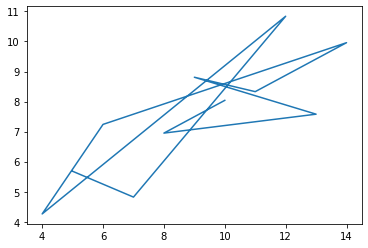

In [49]:
plt.plot(dataset_1['x'], dataset_1['y'])

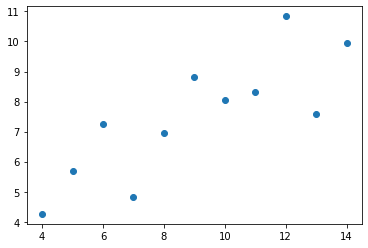

In [50]:
# 3번째 인자는 표시 방법
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

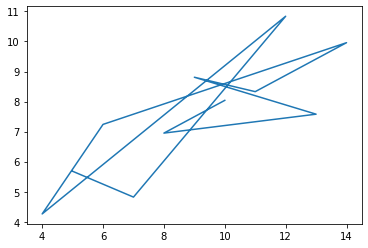

In [51]:
plt.plot(dataset_1['x'], dataset_1['y'], '-')

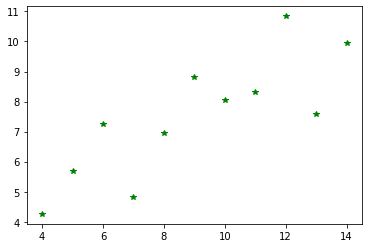

In [52]:
# 4번째 인자는 색상
plt.plot(dataset_1['x'], dataset_1['y'], '*', c='g')

In [53]:
dataset_2 = anscombe[anscombe['dataset']== 'II']
dataset_3 = anscombe[anscombe['dataset']== 'III']
dataset_4 = anscombe[anscombe['dataset']== 'IV']

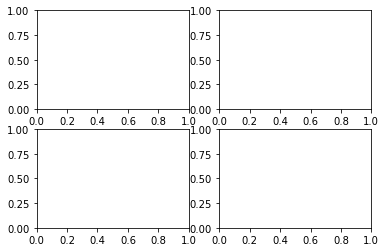

In [54]:
# 그래프를 그릴 도화지 생성
fig = plt.figure()

# 도화지 위에 여러개의 그래프를 그릴 때 subplot 을 사용해 빈 그래프 창을 만들며
# 1,2 번째 인자는 2*2=4로 총 4개의 그래프를 말하며 3번째는 순서를 나타낸다, 순서는 11시부터 시계방향이다.
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

In [55]:
# 실제 그래프에 들어갈 데이터들을 각 그래프에 지정
axes1.plot(dataset_1['x'], dataset_1['y'], 'o', c='r')
axes2.plot(dataset_2['x'], dataset_2['y'], 'x', c='y')
axes3.plot(dataset_3['x'], dataset_3['y'], '*', c='g')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o', c='b')


In [56]:
# 각 그래프들의 제목을 입력
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

Text(0.5, 1.0, 'dataset_4')

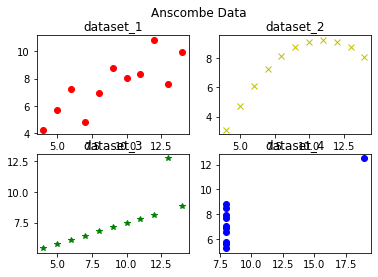

In [57]:
# 전체 도화지의 제목 설정
fig.suptitle('Anscombe Data')
fig

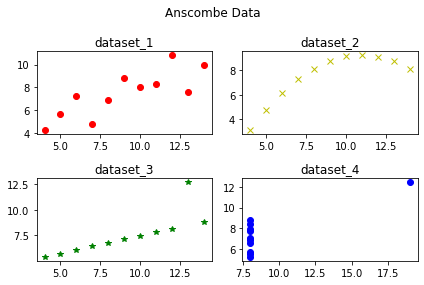

In [58]:
# 도화지의 그래프 간격 조절
fig.tight_layout()
fig

In [59]:
# tip을 지불한 손님들의 데이터
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


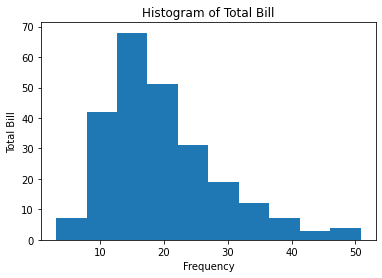

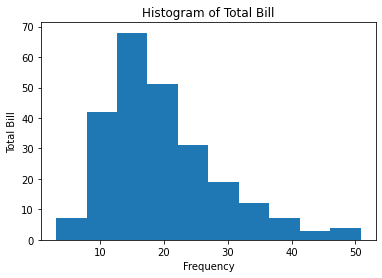

In [60]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins=10)

# 타이틀 설정
axes1.set_title('Histogram of Total Bill')
# x값 설정
axes1.set_xlabel('Frequency')
# y값 설정
axes1.set_ylabel('Total Bill')

fig

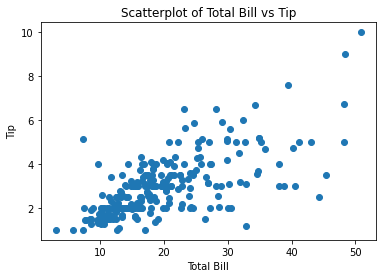

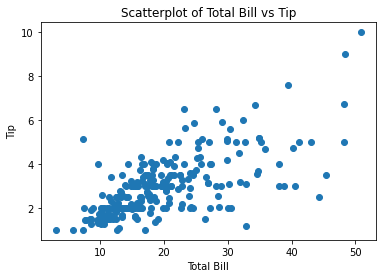

In [61]:
# 총 식사금액과 tip 크기의 관계
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

scatter_plot

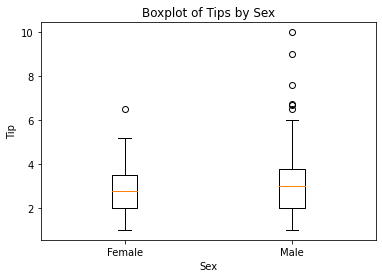

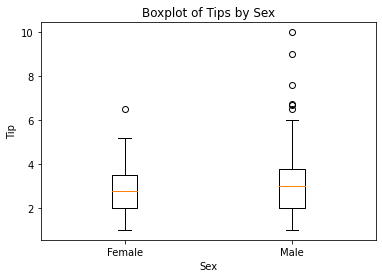

In [62]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot(
    [tips[tips['sex'] == 'Female']['tip'],
    tips[tips['sex'] == 'Male']['tip']],
    labels = ['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

boxplot

In [63]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else :
        return 1

In [64]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [65]:
tips['sex_color'] = tips['sex'].apply(recode_sex)
print(tips.head())

   total_bill   tip     sex smoker  day    time  size sex_color
0       16.99  1.01  Female     No  Sun  Dinner     2         0
1       10.34  1.66    Male     No  Sun  Dinner     3         1
2       21.01  3.50    Male     No  Sun  Dinner     3         1
3       23.68  3.31    Male     No  Sun  Dinner     2         1
4       24.59  3.61  Female     No  Sun  Dinner     4         0


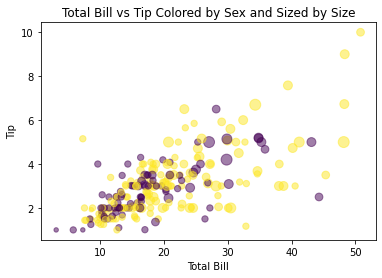

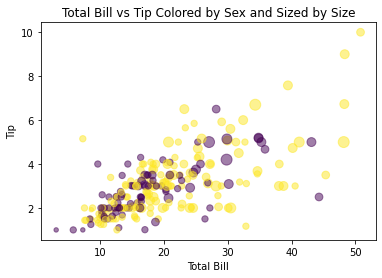

In [66]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 20, # 점 사이즈
    c=tips['sex_color'], # 점 색상
    alpha=0.5) # 투명도
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

scatter_plot

In [67]:
import seaborn as sns

tips = sns.load_dataset('tips')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

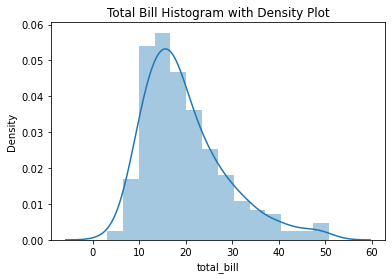

In [68]:
# 기본 틀 만들기 = plt.figure()
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

Text(0, 0.5, 'Frequency')

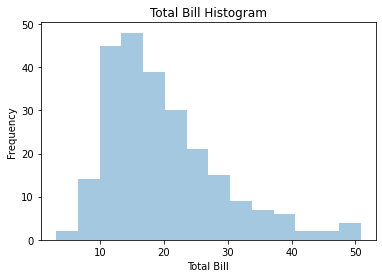

In [69]:
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'], kde=False) # kde = 밀집도 그래프 표시 여부
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

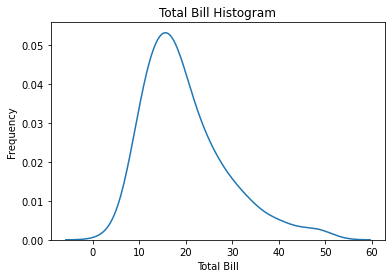

In [70]:
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'], hist=False) # hist = 히스토그램 제외, 밀집도 그래프만 표시
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

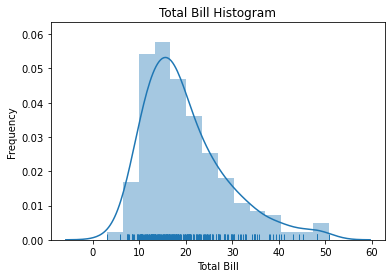

In [71]:
ax = plt.subplot()
ax = sns.distplot(tips['total_bill'], rug=True) # 양탄자 그래프(밀집 정도) 표기(기본=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

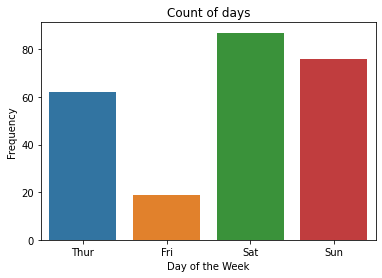

In [72]:
ax = plt.subplot()
ax = sns.countplot('day', data=tips) # tips의 day 데이터로 카운트 그래프 그리기 
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Tip')

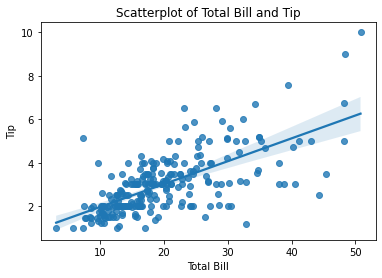

In [73]:
ax = plt.subplot()
ax = sns.regplot(x='total_bill', y='tip', data=tips) # 산점도 그래프
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

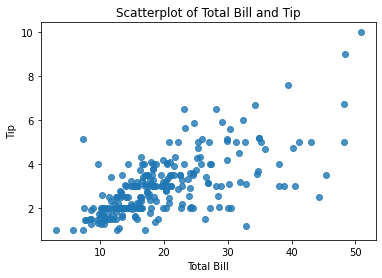

In [74]:
ax = plt.subplot()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) # fit_reg = 회귀선
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

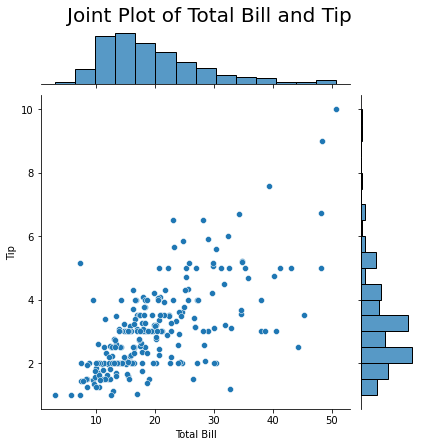

In [75]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips) 
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=20, y=1.03) # fontsize = 그래프(글자) 크기, y =그래프 높이

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

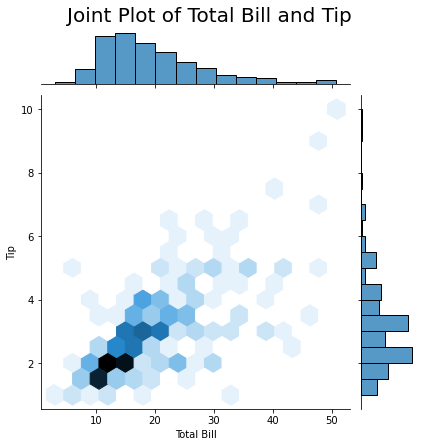

In [76]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex') # kind = 점 표시 형태 
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=20, y=1.03) # fontsize = 그래프(글자) 크기, y =그래프 높이

Text(0, 0.5, 'Tip')

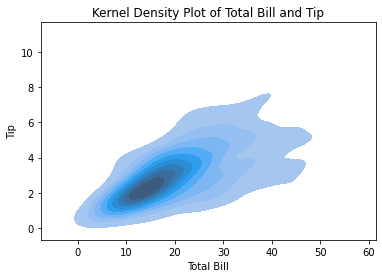

In [77]:
ax = plt.subplot()
ax = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

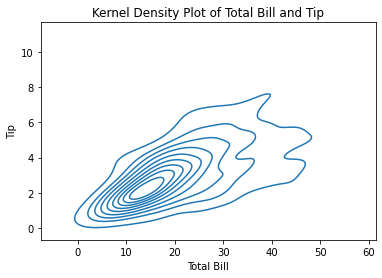

In [78]:
ax = plt.subplot()
ax = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=False)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Average total bill')

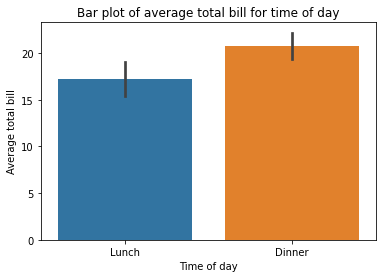

In [79]:
ax = plt.subplot()
ax = sns.barplot(x='time', y='total_bill', data=tips) # 지정변수의 평균을 계산해 그리는 그래프
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'total bill')

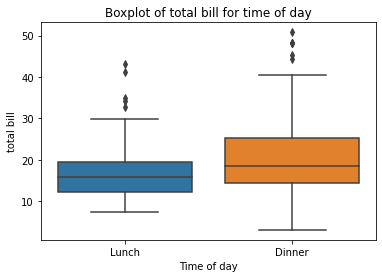

In [80]:
ax = plt.subplot()
ax = sns.boxplot(x='time', y='total_bill', data=tips) # boxplot = 4분위수와 최대,최소, 이상치 등 다양한 통계량을 표현
ax.set_title('Boxplot of total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('total bill')

Text(0, 0.5, 'total bill')

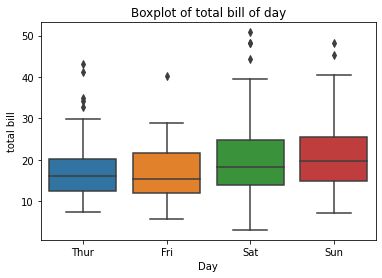

In [81]:
# 요일별 식사금액 분포
ax = plt.subplot()
ax = sns.boxplot(x='day', y='total_bill', data=tips) # violin plot = 박스플롯에 표기되지 않는 커널 밀도를 표기 가능
ax.set_title('Boxplot of total bill of day')
ax.set_xlabel('Day')
ax.set_ylabel('total bill')

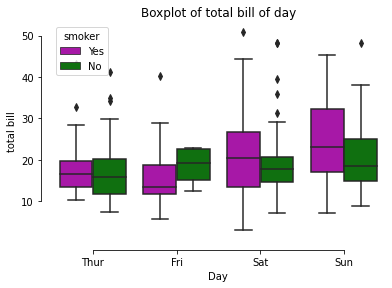

In [82]:
# 요일별 흡연여부 별 식사비용
ax = plt.subplot()
ax = sns.boxplot(x='day', y='total_bill', hue='smoker', palette=["m", "g"], data=tips) # hue = 색, 빛깔로 나눌 기준을 뜻하는 듯
ax.set_title('Boxplot of total bill of day')
ax.set_xlabel('Day')
ax.set_ylabel('total bill')
sns.despine(offset=10, trim=True)

Text(0, 0.5, 'total bill')

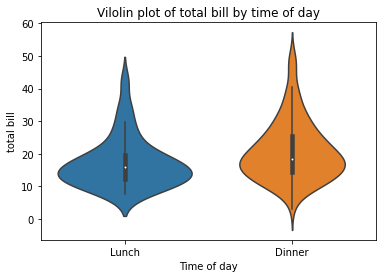

In [83]:
# 식사 시간 별 식사비
ax = plt.subplot()
ax = sns.violinplot(x='time', y='total_bill', data=tips) # violin plot = 박스플롯에 표기되지 않는 커널 밀도를 표기 가능
ax.set_title('Vilolin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('total bill')

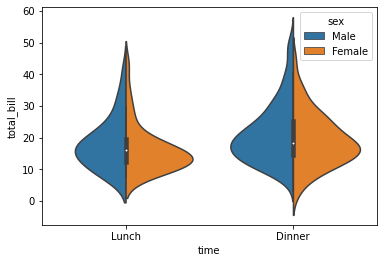

In [84]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

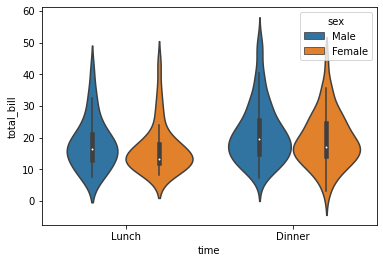

In [85]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=False) # split은 hue 인자값을 합쳐서 표현할지 나눠 표현할지 결정

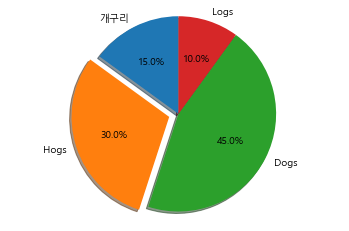

In [86]:
# matplotlib 한글 표기 방법
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:/Windows/Fonts/malgun.ttf'
# f_path = '/library/Fonts/AppleGothic.ttf' (맥)
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

labels = '개구리','Hogs','Dogs','Logs'
sizes = [15,30,45,10]
explode = (0, 0.1, 0, 0) # 떨어뜨릴 파이

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) # startangle 기준으로 반시계방향 순서
ax1.axis('equal')
plt.show()

In [90]:
df1 = pd.read_csv('datascience\data\concat_1.csv')
df2 = pd.read_csv('datascience\data\concat_2.csv')
df3 = pd.read_csv('datascience\data\concat_3.csv')

In [95]:
df1.head()

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [91]:
row_concat = pd.concat([df1, df2, df3])
print(row_concat)

     A    B    C    D
0   a0   b0   c0   d0
1   a1   b1   c1   d1
2   a2   b2   c2   d2
3   a3   b3   c3   d3
0   a4   b4   c4   d4
1   a5   b5   c5   d5
2   a6   b6   c6   d6
3   a7   b7   c7   d7
0   a8   b8   c8   d8
1   a9   b9   c9   d9
2  a10  b10  c10  d10
3  a11  b11  c11  d11


In [96]:
print(row_concat.iloc[3,])

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object


In [108]:
new_row_series = pd.Series(['n1','n2','n3','n4'])
print(pd.concat([df1, new_row_series]))

     A    B    C    D    0
0   a0   b0   c0   d0  NaN
1   a1   b1   c1   d1  NaN
2   a2   b2   c2   d2  NaN
3   a3   b3   c3   d3  NaN
0  NaN  NaN  NaN  NaN   n1
1  NaN  NaN  NaN  NaN   n2
2  NaN  NaN  NaN  NaN   n3
3  NaN  NaN  NaN  NaN   n4


In [109]:
# concat 시 데이터프레임으로 변경 후 처리
new_row_df = pd.DataFrame([['n1','n2','n3','n4']], columns = ['A','B','C','D'])
print(new_row_series)

0    n1
1    n2
2    n3
3    n4
dtype: object


In [112]:
print(pd.concat([df1, new_row_df]))

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
0  n1  n2  n3  n4


In [111]:
print(df1.append(new_row_df))

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
0  n1  n2  n3  n4


In [113]:
# append 시 ignore_index 옵션을 True로 주면 데이터가 합쳐진 후 인덱스가 초기화 된다. (= concat도 동일)
data_dict = {'A':'n1', 'B':'n2', 'C':'n3', 'D':'n4'}
print(df1.append(data_dict, ignore_index=True))

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  n1  n2  n3  n4


In [114]:
row_concat_i = pd.concat([df1, df2, df3], ignore_index=True)
print(row_concat_i)

      A    B    C    D
0    a0   b0   c0   d0
1    a1   b1   c1   d1
2    a2   b2   c2   d2
3    a3   b3   c3   d3
4    a4   b4   c4   d4
5    a5   b5   c5   d5
6    a6   b6   c6   d6
7    a7   b7   c7   d7
8    a8   b8   c8   d8
9    a9   b9   c9   d9
10  a10  b10  c10  d10
11  a11  b11  c11  d11


In [115]:
# axis 기본값은 행방향(=0) 1은 열 방향(=->)
col_concat = pd.concat([df1, df2, df3], axis=1)
print(col_concat)

    A   B   C   D   A   B   C   D    A    B    C    D
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11


In [117]:
print(col_concat['A'])

    A   A    A
0  a0  a4   a8
1  a1  a5   a9
2  a2  a6  a10
3  a3  a7  a11


In [118]:
col_concat['new_col_list'] = ['n1','n2','n3','n4']
print(col_concat)

    A   B   C   D   A   B   C   D    A    B    C    D new_col_list
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8           n1
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9           n2
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10           n3
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11           n4


In [119]:
print(pd.concat([df1, df2, df3], axis=1, ignore_index=True))

   0   1   2   3   4   5   6   7    8    9    10   11
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11


In [124]:
df1.columns = ['A','B','C','D']
df2.columns = ['E','F','G','H']
df3.columns = ['A','C','F','H']

In [125]:
print(df2)

    E   F   G   H
0  a4  b4  c4  d4
1  a5  b5  c5  d5
2  a6  b6  c6  d6
3  a7  b7  c7  d7


In [126]:
row_concat = pd.concat([df1, df2, df3])
print(row_concat)

     A    B    C    D    E    F    G    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN
0  NaN  NaN  NaN  NaN   a4   b4   c4   d4
1  NaN  NaN  NaN  NaN   a5   b5   c5   d5
2  NaN  NaN  NaN  NaN   a6   b6   c6   d6
3  NaN  NaN  NaN  NaN   a7   b7   c7   d7
0   a8  NaN   b8  NaN  NaN   c8  NaN   d8
1   a9  NaN   b9  NaN  NaN   c9  NaN   d9
2  a10  NaN  b10  NaN  NaN  c10  NaN  d10
3  a11  NaN  b11  NaN  NaN  c11  NaN  d11


In [131]:
print(pd.concat([df1, df2, df3], join = 'inner'))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]


In [132]:
print(pd.concat([df1, df3], join = 'inner'))

     A    C
0   a0   c0
1   a1   c1
2   a2   c2
3   a3   c3
0   a8   b8
1   a9   b9
2  a10  b10
3  a11  b11


In [133]:
df1.index = [0,1,2,3]
df2.index = [4,5,6,7]
df3.index = [0,2,5,7]

col_concat = pd.concat([df1, df2, df3], axis=1)
print(col_concat)

     A    B    C    D    E    F    G    H    A    C    F    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN   a8   b8   c8   d8
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN   a9   b9   c9   d9
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN   a4   b4   c4   d4  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN   a5   b5   c5   d5  a10  b10  c10  d10
6  NaN  NaN  NaN  NaN   a6   b6   c6   d6  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN   a7   b7   c7   d7  a11  b11  c11  d11


In [136]:
print(pd.concat([df1, df3], join='inner', axis=1))

    A   B   C   D   A   C   F   H
0  a0  b0  c0  d0  a8  b8  c8  d8
2  a2  b2  c2  d2  a9  b9  c9  d9


In [146]:
person = pd.read_csv('datascience/data/survey_person.csv')
site = pd.read_csv('datascience/data/survey_site.csv')
survey = pd.read_csv('datascience/data/survey_survey.csv')
visited = pd.read_csv('datascience/data/survey_visited.csv')

In [147]:
print(person)

      ident   personal    family
0      dyer    William      Dyer
1        pb      Frank   Pabodie
2      lake   Anderson      Lake
3       roe  Valentina   Roerich
4  danforth      Frank  Danforth


In [148]:
visited_subset = visited.loc[[0, 2, 6], ]

In [151]:
print(visited_subset)
print()
print(site)

   ident   site       dated
0    619   DR-1  1927-02-08
2    734   DR-3  1939-01-07
6    837  MSK-4  1932-01-14

    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40


In [152]:
o2o_merge = site.merge(visited_subset, left_on='name', right_on='site')
print(o2o_merge)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [154]:
print(site)
print(visited)

    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40
   ident   site       dated
0    619   DR-1  1927-02-08
1    622   DR-1  1927-02-10
2    734   DR-3  1939-01-07
3    735   DR-3  1930-01-12
4    751   DR-3  1930-02-26
5    752   DR-3         NaN
6    837  MSK-4  1932-01-14
7    844   DR-1  1932-03-22


In [153]:
m2o_merge = site.merge(visited, left_on='name', right_on='site')
print(m2o_merge)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [155]:
ps = person.merge(survey, left_on='ident', right_on='person')
vs = visited.merge(survey, left_on='ident', right_on='taken')

In [157]:
print(vs)

    ident   site       dated  taken person quant  reading
0     619   DR-1  1927-02-08    619   dyer   rad     9.82
1     619   DR-1  1927-02-08    619   dyer   sal     0.13
2     622   DR-1  1927-02-10    622   dyer   rad     7.80
3     622   DR-1  1927-02-10    622   dyer   sal     0.09
4     734   DR-3  1939-01-07    734     pb   rad     8.41
5     734   DR-3  1939-01-07    734   lake   sal     0.05
6     734   DR-3  1939-01-07    734     pb  temp   -21.50
7     735   DR-3  1930-01-12    735     pb   rad     7.22
8     735   DR-3  1930-01-12    735    NaN   sal     0.06
9     735   DR-3  1930-01-12    735    NaN  temp   -26.00
10    751   DR-3  1930-02-26    751     pb   rad     4.35
11    751   DR-3  1930-02-26    751     pb  temp   -18.50
12    751   DR-3  1930-02-26    751   lake   sal     0.10
13    752   DR-3         NaN    752   lake   rad     2.19
14    752   DR-3         NaN    752   lake   sal     0.09
15    752   DR-3         NaN    752   lake  temp   -16.00
16    752   DR

In [158]:
print(ps)

   ident   personal   family  taken person quant  reading
0   dyer    William     Dyer    619   dyer   rad     9.82
1   dyer    William     Dyer    619   dyer   sal     0.13
2   dyer    William     Dyer    622   dyer   rad     7.80
3   dyer    William     Dyer    622   dyer   sal     0.09
4     pb      Frank  Pabodie    734     pb   rad     8.41
5     pb      Frank  Pabodie    734     pb  temp   -21.50
6     pb      Frank  Pabodie    735     pb   rad     7.22
7     pb      Frank  Pabodie    751     pb   rad     4.35
8     pb      Frank  Pabodie    751     pb  temp   -18.50
9   lake   Anderson     Lake    734   lake   sal     0.05
10  lake   Anderson     Lake    751   lake   sal     0.10
11  lake   Anderson     Lake    752   lake   rad     2.19
12  lake   Anderson     Lake    752   lake   sal     0.09
13  lake   Anderson     Lake    752   lake  temp   -16.00
14  lake   Anderson     Lake    837   lake   rad     1.46
15  lake   Anderson     Lake    837   lake   sal     0.21
16   roe  Vale

In [160]:
# 열 이름이 같아도 데이터 타입이 다른 경우 다르게 인식
# 열 이름이 같은 경우 구분을 위해 참조된 순서에 따라의 이름을(왼쪽 DF는 _x, 오른쪽 DF는 _y) 옆에 표기해준다.
ps_vs = ps.merge(vs, left_on=['ident','taken','quant','reading'], right_on=['person','ident','quant','reading'])
print(ps_vs.head())

  ident_x personal   family  taken_x person_x quant  reading  ident_y  site  \
0    dyer  William     Dyer      619     dyer   rad     9.82      619  DR-1   
1    dyer  William     Dyer      619     dyer   sal     0.13      619  DR-1   
2    dyer  William     Dyer      622     dyer   rad     7.80      622  DR-1   
3    dyer  William     Dyer      622     dyer   sal     0.09      622  DR-1   
4      pb    Frank  Pabodie      734       pb   rad     8.41      734  DR-3   

        dated  taken_y person_y  
0  1927-02-08      619     dyer  
1  1927-02-08      619     dyer  
2  1927-02-10      622     dyer  
3  1927-02-10      622     dyer  
4  1939-01-07      734       pb  


In [163]:
ps_vs.to_csv('ps_vs.csv', encoding='utf-8-sig')

In [164]:
ps.to_csv('ps.csv', encoding='utf-8-sig')
vs.to_csv('vs.csv', encoding='utf-8-sig')

In [167]:
ps_vs = ps.merge(vs, left_on=['taken','person','quant','reading'], right_on=['taken','person','quant','reading'])
print(ps_vs.head())

  ident_x personal   family  taken person quant  reading  ident_y  site  \
0    dyer  William     Dyer    619   dyer   rad     9.82      619  DR-1   
1    dyer  William     Dyer    619   dyer   sal     0.13      619  DR-1   
2    dyer  William     Dyer    622   dyer   rad     7.80      622  DR-1   
3    dyer  William     Dyer    622   dyer   sal     0.09      622  DR-1   
4      pb    Frank  Pabodie    734     pb   rad     8.41      734  DR-3   

        dated  
0  1927-02-08  
1  1927-02-08  
2  1927-02-10  
3  1927-02-10  
4  1939-01-07  


In [166]:
print(vs.info())
print(ps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ident    21 non-null     int64  
 1   site     21 non-null     object 
 2   dated    17 non-null     object 
 3   taken    21 non-null     int64  
 4   person   19 non-null     object 
 5   quant    21 non-null     object 
 6   reading  21 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ident     19 non-null     object 
 1   personal  19 non-null     object 
 2   family    19 non-null     object 
 3   taken     19 non-null     int64  
 4   person    19 non-null     object 
 5   quant     19 non-null     object 
 6   reading   19 non-null     float64
dtypes: float64(1), int64(1), object